In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [13]:
newdata = pd.read_csv("data/newdata.csv")

In [14]:
newdata

,Unnamed: 0,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Down,Flat,Up,LVH,Normal,ST,ASY,ATA,NAP,TA
0,0,40,1,140,289,0,172,0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,1,0,0,0,1,0
2,2,37,1,130,283,0,98,0,0.0,0,0,0,1,0,0,1,0,1,0,0
3,3,48,0,138,214,0,108,1,1.5,1,0,1,0,0,1,0,1,0,0,0
4,4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,45,1,110,264,0,132,0,1.2,1,0,1,0,0,1,0,0,0,0,1
914,914,68,1,144,193,1,141,0,3.4,1,0,1,0,0,1,0,1,0,0,0
915,915,57,1,130,131,0,115,1,1.2,1,0,1,0,0,1,0,1,0,0,0
916,916,57,0,130,236,0,174,0,0.0,1,0,1,0,1,0,0,0,1,0,0


In [15]:
#drop index col
newdata = newdata.drop("Unnamed: 0", axis=1)

In [16]:
# Create features and labels
X = newdata.drop('HeartDisease', axis=1)  
y = newdata['HeartDisease'] 

# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10)

In [17]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [18]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

In [19]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :76.08695652173914

AUC is :0.76

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,66,20,86
1,24,74,98
All,90,94,184


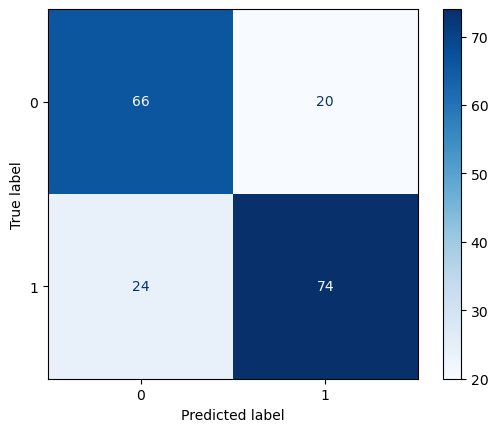

In [20]:
# Alternative confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

In [21]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

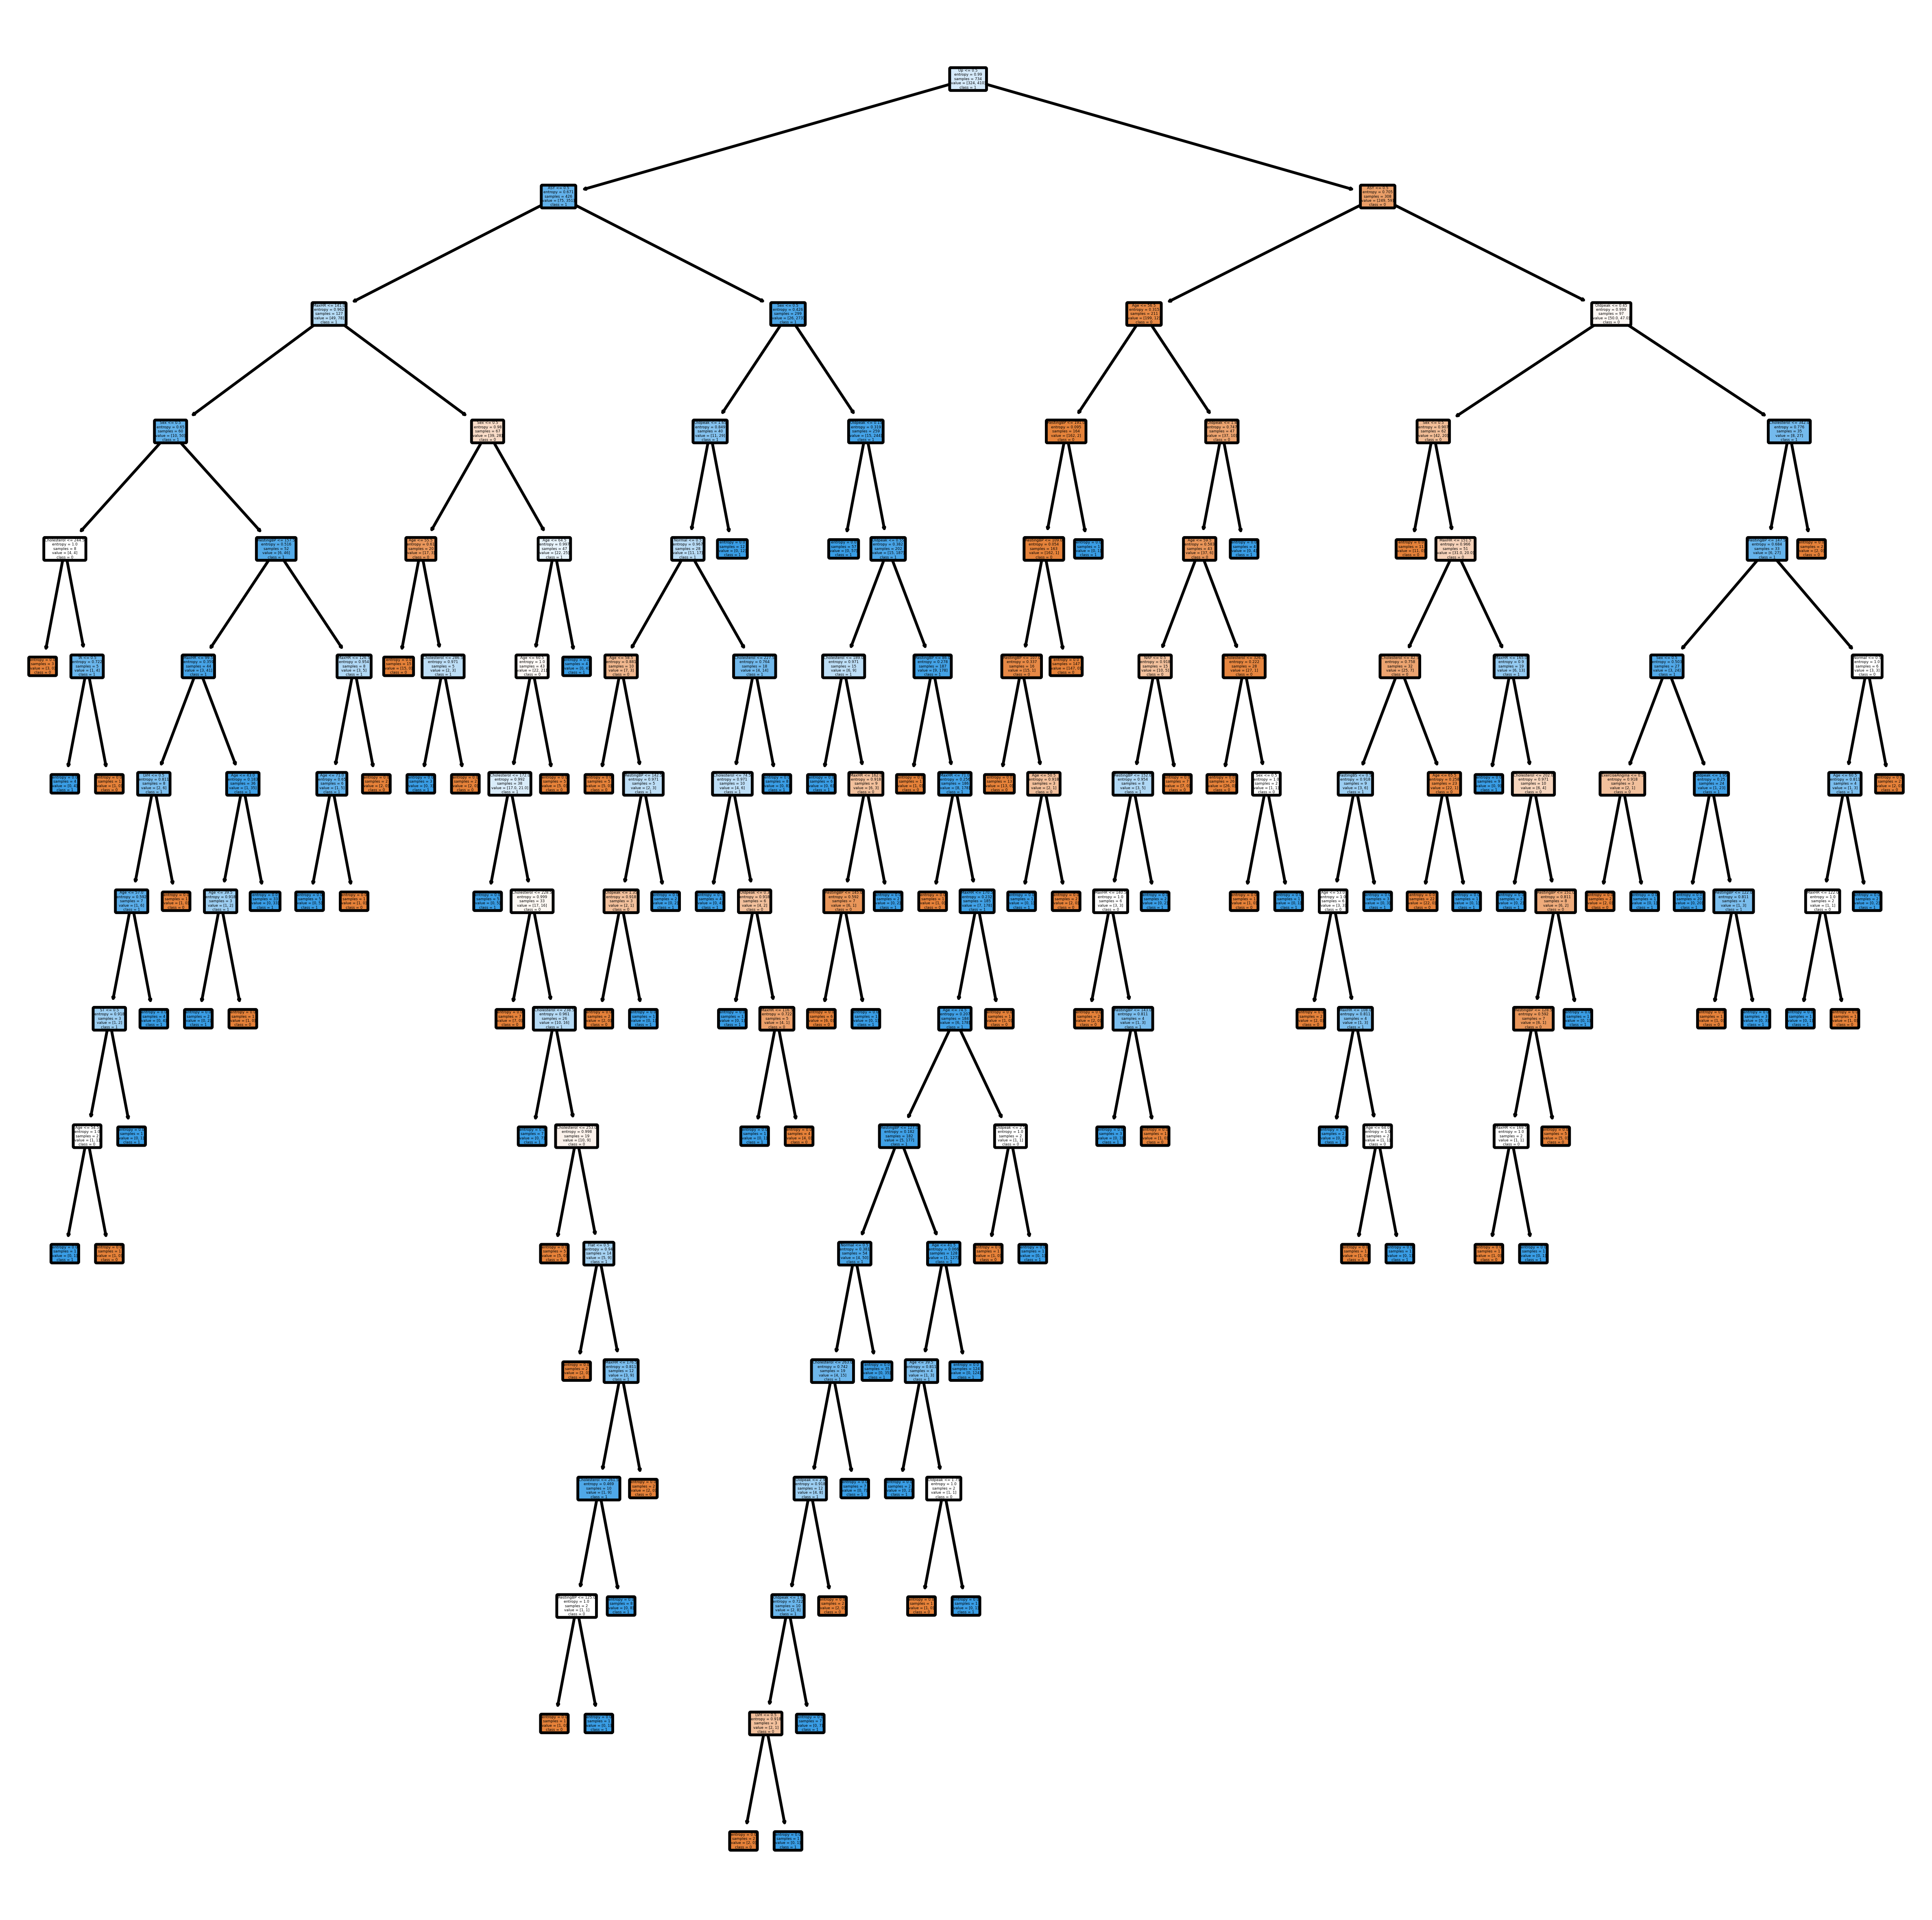

In [22]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()